### Criação de um modelo de Machine Learning e Deploy na nuvem IBM atraves do Watsonx.AI

##### Para esse exemplo, usaremos o banco de dados encontrado na kaggle https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set?resource=download

###### Utilizaremos um classificador de Random Forest padrão, com parametros Default. Após a criação do Modelo vamos fazer o deploy no wx.ai

In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import os
from dotenv import load_dotenv
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings

warnings.filterwarnings('ignore')

In [2]:
load_dotenv()

True

In [3]:
#### Lendo o arquivo contendo os dados 

data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [4]:
# view dimensions of dataset

df.shape

(1728, 7)

#### Agora nas proximas celulas iremos fazer a visualização dos dados

In [5]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
#### Como esse dataset vem sem os headers, aqui os adicionaremos
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# Vamos verificar o dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
df['class'].value_counts()


class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [11]:
df.isnull().sum()


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
X = df.drop(['class'], axis=1)

y = df['class']

### Divindo os dados entre treinamento e teste

In [13]:
# Aqui, utilizando a função nativa do sklearn iremos dividir os datasets entre treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
# verificando o shape das amostras
X_train.shape, X_test.shape

((1157, 6), (571, 6))

##### Feature Engineering
###### Transformando os dados "raw" em features que trazem mais valor para nosso modelo

In [15]:
# verificando o tipo dos dados

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [16]:
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [17]:
# import category encoders

import category_encoders as ce

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
import sklearn as se

In [20]:
print(se.__version__)

1.6.1


In [21]:
# agora iremos traduzir variaveis categoricas em numéricas

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [22]:
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [23]:
X_test.head()


,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


##### Classificador de Random Forest com parametros Default


In [24]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# Instanciando o classificador

rfc = RandomForestClassifier(random_state=0)



# Aplicando o classificador para os dados de treino

rfc.fit(X_train, y_train)



# Verificando o treinamento com os dados de teste

y_pred = rfc.predict(X_test)



# Aqui verificamos a acuracia do nosso modelo

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


###### Encontrando a importancia de cada feature

In [25]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
# Verificando a pontuação de cada feature

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

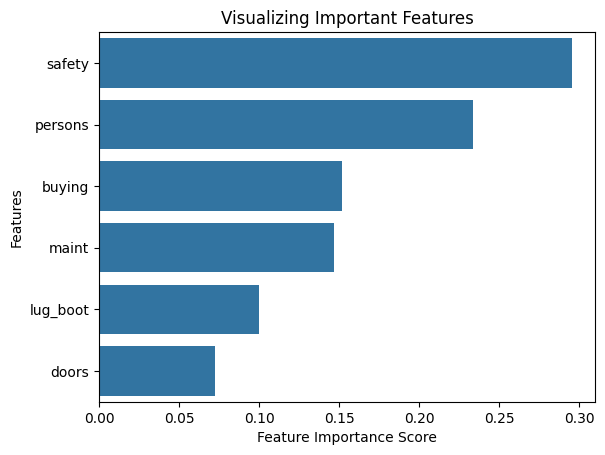

In [27]:
# Criando um grafico de barras seaborn

sns.barplot(x=feature_scores, y=feature_scores.index)





plt.xlabel('Feature Importance Score')

plt.ylabel('Features')





plt.title("Visualizing Important Features")




plt.show()

##### Matriz de Confusão    

In [28]:
# Agora vamos verificar a matriz de confusão

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[114   9   4   2]
 [  2  17   0   1]
 [  8   0 389   0]
 [  3   2   0  20]]


##### Classification Report

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.90      0.88      0.89       129
        good       0.61      0.85      0.71        20
       unacc       0.99      0.98      0.98       397
       vgood       0.87      0.80      0.83        25

    accuracy                           0.95       571
   macro avg       0.84      0.88      0.85       571
weighted avg       0.95      0.95      0.95       571



###### Agora vamos fazer o deploy na IBM Cloud atraves do Watsonx Ai

In [30]:
### Instalando a biblioteca necessária da IBM
!pip install -U ibm-watsonx-ai 

  Using cached requests-2.32.2-py3-none-any.whl.metadata (4.6 kB)
Using cached requests-2.32.2-py3-none-any.whl (63 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.5
    Uninstalling requests-2.32.5:
      Successfully uninstalled requests-2.32.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
auth0-python 4.9.0 requires requests>=2.32.3, but you have requests 2.32.2 which is incompatible.
ibm-cloud-sdk-core 3.24.2 requires requests<3.0.0,>=2.32.4, but you have requests 2.32.2 which is incompatible.
ibm-watson-machine-learning 1.0.367 requires pandas<2.2.0,>=0.24.2, but you have pandas 2.2.3 which is incompatible.
instructor 1.7.8 requires requests<3.0.0,>=2.32.3, but you have requests 2.32.2 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
model = clf

###### O primeiro passo é criar uma conexão com o watsonx.ai
###### Nós iremos fazer essa conexão através de um Client presente na biblioteca do watsonx
###### Para isso nosso primeiro passo e gerar uma Chave de Api na IBM Cloud para utilizarmos aqui.

In [32]:
CLOUD_API_KEY = os.getenv('API_KEY')

In [33]:
print (CLOUD_API_KEY)

r3hfHOTrGO_jC2gLvyc05LuRnRpDjZiHoDBSK4awqwwV


###### Agora iremos nos conectar com o watsonx

In [34]:
# WML_CREDENTIALS = {
#     "url": "https://us-south.ml.cloud.ibm.com",
#     "apikey": CLOUD_API_KEY
# }
WML_CREDENTIALS = {
    "url": "https://eu-de.ml.cloud.ibm.com",
    "apikey": CLOUD_API_KEY
}

In [35]:
import json
from ibm_watson_machine_learning import APIClient

wml_client = APIClient(WML_CREDENTIALS)
wml_client.version

'1.0.367'

###### Agora que temos nossa conexão com o Client do watsonx
###### Precisamos selecionar para qual espaço de implementação iremos fazer o deploy do nosso Modelo
###### Utilizaremos o space id para selecionar nosso espaço

In [36]:
space_id = os.getenv('SPACE_ID')

In [37]:
wml_client.set.default_space(space_id)

'SUCCESS'

###### Agora iremos armazenar alguns metadados como o nome do modelo, biblioteca utilizada e dados de treinamento

In [38]:
sofware_spec_id = wml_client.software_specifications.get_id_by_name("runtime-24.1-py3.11")

In [39]:
metadata = {
            wml_client.repository.ModelMetaNames.NAME: 'Modelo Classificador Banco Local',
            wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.3',
            wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_id
}

In [40]:
train_labels = y_train
train_data = X_train

###### Fazendo o Deploy do modelo

In [41]:
published_model = wml_client.repository.store_model(
    model=model,
    meta_props=metadata,
    training_data=train_data,
    training_target=train_labels)

###### Agora vamos verificar os detalhes do modelo publicado 
###### Teste para ver se a conexão deu certo

In [42]:
import json

published_model_id = wml_client.repository.get_model_id(published_model)
model_details = wml_client.repository.get_details(published_model_id)
print(json.dumps(model_details, indent=2))

{
  "metadata": {
    "name": "Modelo Classificador Banco Local",
    "space_id": "a83d5730-2e4c-4332-a978-635834cbe265",
    "resource_key": "bd6f6333-1d69-4275-ba1f-1585b12c4094",
    "id": "5d1392c6-e81d-4423-bc9c-c4868c7f7c09",
    "created_at": "2025-08-26T13:10:03Z",
    "rov": {
      "member_roles": {
        "IBMid-696000BK9F": {
          "user_iam_id": "IBMid-696000BK9F",
          "roles": [
            "OWNER"
          ]
        }
      }
    },
    "owner": "IBMid-696000BK9F"
  },
  "entity": {
    "software_spec": {
      "id": "45f12dfe-aa78-5b8d-9f38-0ee223c47309"
    },
    "type": "scikit-learn_1.3",
    "training_data_references": [
      {
        "id": "1",
        "type": "container",
        "connection": null,
        "location": {},
        "schema": {
          "id": "1",
          "type": "DataFrame",
          "fields": [
            {
              "name": "buying",
              "type": "int64",
              "nullable": false
            },
            

###### Agora com o Modelo Publicado no WatsonX vamos criar sua Implementação
###### A implementação irá gerar uma URL para podermos consumirmos o modelo online

In [43]:
metadata = {
    wml_client.deployments.ConfigurationMetaNames.NAME: "Implementação Modelo Banco Local",
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = wml_client.deployments.create(published_model_id, meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: '5d1392c6-e81d-4423-bc9c-c4868c7f7c09' started

#######################################################################################


initializing
Note: online_url and serving_urls are deprecated and will be removed in a future release. Use inference instead.
.
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='140e5b11-7ddf-4c99-b71f-2bce803acdee'
------------------------------------------------------------------------------------------------




In [44]:
deployment_id = wml_client.deployments.get_id(created_deployment)

###### Agora temos nosso modelo implementado em Cloud e podemos consumir via URL 

In [45]:
scoring_endpoint = wml_client.deployments.get_scoring_href(created_deployment)
print(scoring_endpoint)

https://eu-de.ml.cloud.ibm.com/ml/v4/deployments/140e5b11-7ddf-4c99-b71f-2bce803acdee/predictions


In [46]:
wml_client.deployments.list()

------------------------------------  --------------------------------  -----  ------------------------  -------------  ----------  ----------------
GUID                                  NAME                              STATE  CREATED                   ARTIFACT_TYPE  SPEC_STATE  SPEC_REPLACEMENT
140e5b11-7ddf-4c99-b71f-2bce803acdee  Implementação Modelo Banco Local  ready  2025-08-26T13:10:17.620Z  model          supported
------------------------------------  --------------------------------  -----  ------------------------  -------------  ----------  ----------------


,GUID,NAME,STATE,CREATED,ARTIFACT_TYPE,SPEC_STATE,SPEC_REPLACEMENT
0,140e5b11-7ddf-4c99-b71f-2bce803acdee,Implementação Modelo Banco Local,ready,2025-08-26T13:10:17.620Z,model,supported,


###### Vamos fazer um pequeno teste de escoragem para ver o comportamente do modelo

In [47]:
col_names.pop()

'class'

In [48]:
fields = col_names

In [49]:
teste = pd.concat([X_train, y_train], axis=1)

In [50]:
deployment_uid = deployment_id
scoring_endpoint = None
print("deployment id:", deployment_uid)

for deployment in wml_client.deployments.get_details()['resources']:
    if deployment_uid in deployment['metadata']['id']:
        scoring_endpoint = deployment['entity']['status']['online_url']['url']


values= X_train[fields].dropna().sample(100).values.tolist()
payload_scoring = {"fields": fields,"values": values}
payload = {
    wml_client.deployments.ScoringMetaNames.INPUT_DATA: [payload_scoring]
}
scoring_response = wml_client.deployments.score(deployment_uid, payload)

print('Single record scoring result:', '\n fields:', scoring_response['predictions'][0]['fields'], '\n values: ', scoring_response['predictions'][0]['values'][0])

deployment id: 140e5b11-7ddf-4c99-b71f-2bce803acdee
Single record scoring result: 
 fields: ['prediction', 'probability'] 
 values:  ['unacc', [0.0, 0.0, 1.0, 0.0]]
